# India Home Prices

In [ ]:
#install dependencies in terminal
#pip install pandas numpy scikit-learn matplotlib seaborn jupyter

In [4]:
import pandas as pd

df = pd.read_csv('House Price India.csv')
#df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

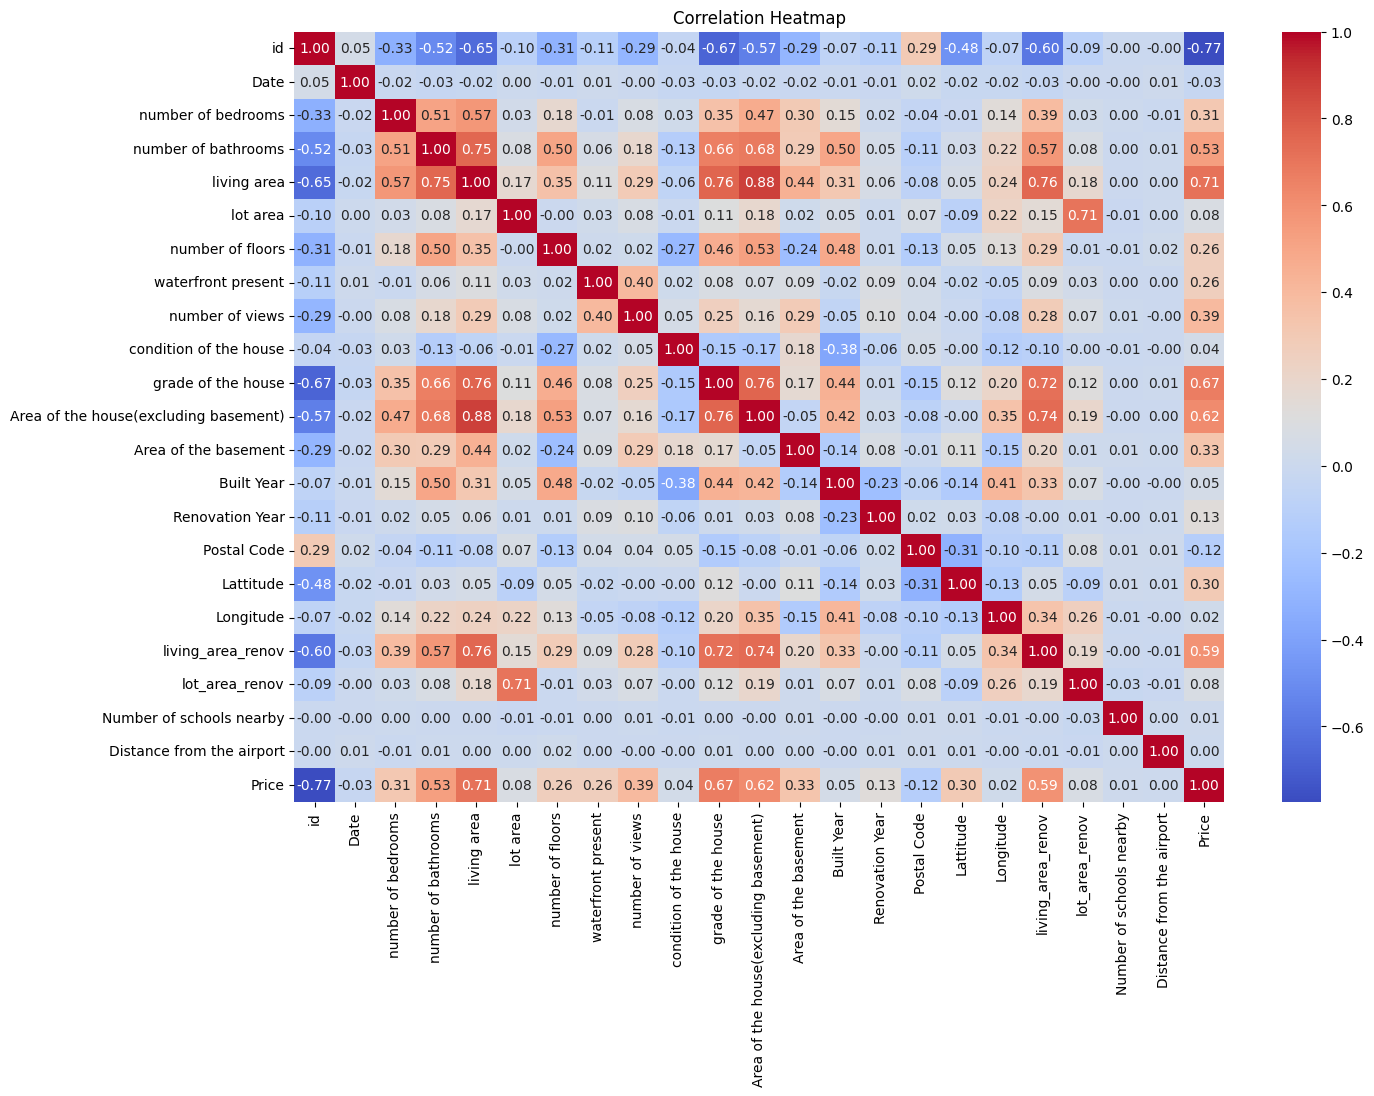

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns  

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Baseline Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop(['Price','id'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
model = RandomForestRegressor(n_estimators=100, random_state=55)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 136609.92581501786
R-squared: 0.8750132022872362


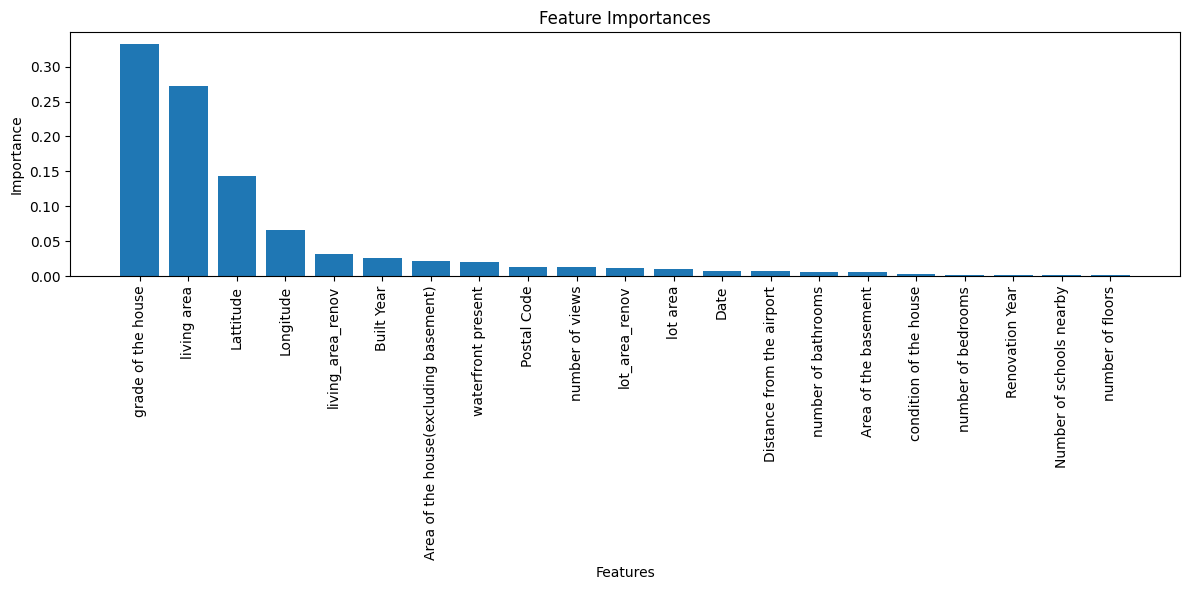

In [16]:
# Plotting the feature importances
importances = model.feature_importances_    
feature_names = X.columns
indices = importances.argsort()[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=55),
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1            # Use all available cores
)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)
